In [36]:
import numpy as np
import pandas as pd
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [41]:
data = pd.read_csv('./input/eeg-brainwave-dataset-feeling-emotions/out_seed.csv')
data.shape

(26714, 1507)

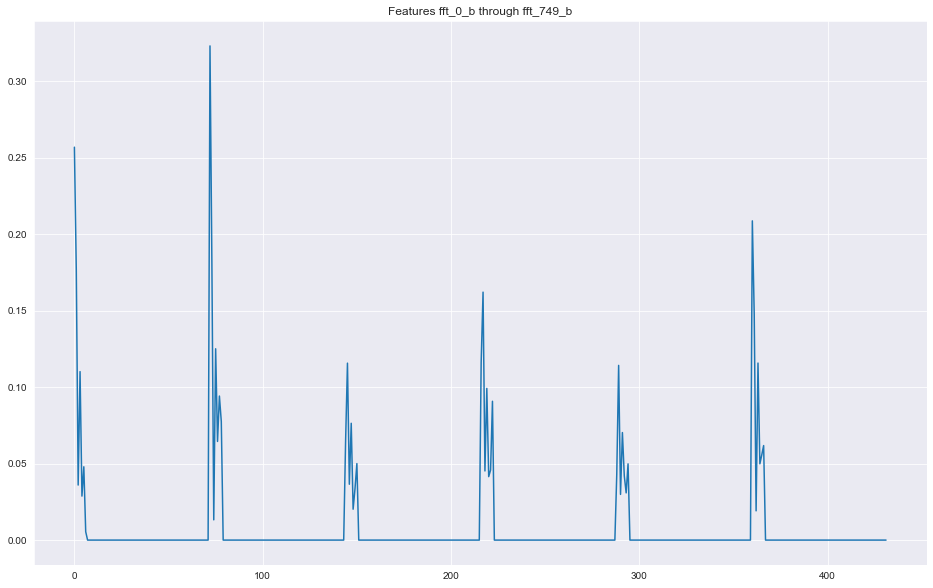

In [42]:
sample = data.loc[0,'freq_010_0':'freq_750_5']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [43]:
data['Label'].value_counts()

1.0    7642
0.0    6992
3.0    6192
2.0    5888
Name: Label, dtype: int64

In [44]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [45]:
def preprocess_inputs(df):
    df = df.copy()

    # df['label'] = df['label'].replace(label_mapping)

    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    return X_train, X_test, y_train, y_test

In [46]:

X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [47]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(128, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1506)]            0         
                                                                 
 tf.expand_dims_2 (TFOpLambd  (None, 1506, 1)          0         
 a)                                                              
                                                                 
 gru_2 (GRU)                 (None, 1506, 128)         50304     
                                                                 
 flatten_2 (Flatten)         (None, 192768)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 771076    
                                                                 
Total params: 821,380
Trainable params: 821,380
Non-trainable params: 0
_____________________________________________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50


2022-06-06 21:36:45.691310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 21:36:45.802809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 21:36:59.031286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - ETA: 0s - loss: 1.8786 - accuracy: 0.2949

2022-06-06 21:39:31.596439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 21:39:31.638755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


234/234 [==============================] - 205s 748ms/step - loss: 1.8786 - accuracy: 0.2949 - val_loss: 1.3666 - val_accuracy: 0.3104
Epoch 2/50
234/234 [==============================] - 129s 552ms/step - loss: 1.3506 - accuracy: 0.3334 - val_loss: 1.3766 - val_accuracy: 0.3155
Epoch 3/50
234/234 [==============================] - 126s 540ms/step - loss: 1.3464 - accuracy: 0.3411 - val_loss: 1.3576 - val_accuracy: 0.3201
Epoch 4/50
234/234 [==============================] - 119s 507ms/step - loss: 1.3453 - accuracy: 0.3446 - val_loss: 1.3534 - val_accuracy: 0.3433
Epoch 5/50
234/234 [==============================] - 123s 526ms/step - loss: 1.3276 - accuracy: 0.3581 - val_loss: 1.3499 - val_accuracy: 0.3481
Epoch 6/50
 17/234 [=>............................] - ETA: 1:39 - loss: 1.2969 - accuracy: 0.3722

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)